In [2]:
from os.path import join, abspath, isfile, dirname
from astropy import units as u
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
%load_ext memory_profiler

ModuleNotFoundError: No module named 'memory_profiler'

In [2]:
def vector_angle(a, b):
    return np.arccos(np.clip(np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)), -1., 1.))

In [27]:
"""read file"""
__file__ = "star_tracker_preproc.ipynb"
data_dir = join(dirname(dirname(abspath(__file__))),"data")
data_path = join(data_dir, "hygdata_v3.csv")
df = pd.read_csv(data_path, ",", usecols=['mag','dec', 'ra', 'x', 'y', 'z'] )

"""filter faint stars"""
mag_thresh = 5.5
df = df[df.mag < mag_thresh]




"""unit conversion"""
df.dec = np.deg2rad(df.dec)
df.ra = df.ra / 24. *2*np.pi # hour to rad
# parsec to km
#df.dist = df.dist * u.parsec.to(u.km)
df.x = df.x * u.parsec.to(u.km)
df.y = df.y * u.parsec.to(u.km)
df.z = df.z * u.parsec.to(u.km)
df_coord_norm = np.sqrt(df.x**2+df.y**2+df.z**2)
df.x = df.x/df_coord_norm
df.y = df.y/df_coord_norm
df.z = df.z/df_coord_norm

# normalized coordinates
#df=df.assign(dist2=df_coord_norm)
#df=df.assign(x_n=np.cos(df.dec)*np.cos(df.ra))
#df=df.assign(y_n=np.cos(df.dec)*np.sin(df.ra))
#df=df.assign(z_n=np.sin(df.dec))

In [27]:
# write to file
df.to_csv(join(data_dir, "stars_mag5_5.tsv"), sep="\t", index=True)

In [44]:
id1_l = []
id2_l = []
mag_id1_l = []
mag_id2_l = []
angle_l = []
star_pairs = {}
star_pairs["id1"] = []
star_pairs["id2"] = []
star_pairs["mag1"] = []
star_pairs["mag2"] = []
star_pairs["angle"] = []

for i, id1 in enumerate(df.index):
    #print('----------')
    for j, id2 in enumerate(df.index[i+1:]):
        # shorthand for both stars
        st1 = df.loc[id1]
        st2 = df.loc[id2]
        
        # positions
        pos1 = np.array([st1.x, st1.y,st1.z])
        pos2 = np.array([st2.x, st2.y,st2.z])
        
        angle = vector_angle(pos1,pos2)
        if angle < np.pi/2:
            star_pairs["angle"].append(angle)

            # ids
            star_pairs["id1"].append(id1)
            star_pairs["id2"].append(id2)

            # magnitudes
            star_pairs["mag1"].append(st1.mag)
            star_pairs["mag2"].append(st2.mag)


In [4]:
#star_df = pd.DataFrame().from_dict(star_pairs).sort_values(['angle', 'id1', 'id2'], ascending=True).reset_index(drop=True)
star_df = pd.read_csv(join(data_dir, "star_pairs_max_90_deg.tsv"), sep='\t')
#star_df.to_csv(join(data_dir, "star_pairs_max_90_deg.tsv"), sep="\t", index=False)
#star_df.to_hdf(join(data_dir, "star_pairs_max_90_deg.hdf5"), key="star_pairs", mode="w")

(array([   6.,    7.,   12.,   39.,   59.,  108.,  210.,  369.,  710.,
        1309.]),
 array([0.03 , 0.576, 1.122, 1.668, 2.214, 2.76 , 3.306, 3.852, 4.398,
        4.944, 5.49 ]),
 <a list of 10 Patch objects>)

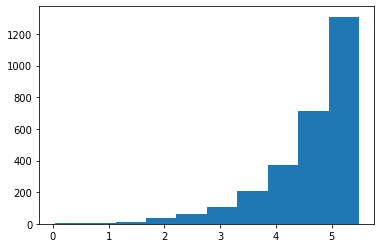

In [40]:
plt.hist(df[df.mag >0].mag)

(array([ 29328.,  82267., 130242., 170274., 207467., 238368., 263748.,
        285589., 298754., 305144.]),
 array([3.94247668e-08, 1.57079665e-01, 3.14159291e-01, 4.71238917e-01,
        6.28318543e-01, 7.85398169e-01, 9.42477795e-01, 1.09955742e+00,
        1.25663705e+00, 1.41371667e+00, 1.57079630e+00]),
 <a list of 10 Patch objects>)

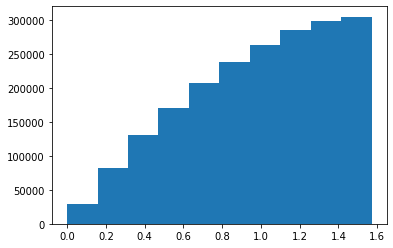

In [46]:
plt.hist(star_df.angle)

In [1]:
df.from_csv(join(data_dir, "stars_mag5_5.tsv"), sep="\t", index=True)

NameError: name 'df' is not defined